In [49]:
#1 CLEAN DATA / IMPUTATION
#2 EDA
#3 CONVERT SET (SOMETIMES OPTIONAL)
#4 PREPROCESSING
#5 SPLIT DATA (DEPENDS)
#6 SELECT MODEL
#7 SELECT HYPERPARAMETERS
#8 COMPOSE INTO PIPELINE/S
#9 SELECT METRICS
#10 EVALUATE SCORE
#11 TUNE HYPERPARAMETERS / CHANGE MODEL
#12 EVALUATE SCORE

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [51]:
#DESCRIPTING DATA

In [52]:
file_path = "dataset/House_Rent_Dataset.csv"

df = pd.read_csv(file_path)

print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [54]:
print(df.describe())

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [55]:
print(df.isna().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [56]:
print(df['Floor'].unique())
print()
print(df['Furnishing Status'].unique())
print()
print(df['Area Type'].unique())
print()
print(df['Tenant Preferred'].unique())
print()
print(df['City'].unique())
print()
print(df['Point of Contact'].unique())
print()
print(df['BHK'].unique())

['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5' '2 out of 2' '2 out of 5' '4 out of 14'
 '3 out of 3' '5 out of 5' '4 out of 4' '7 out of 8' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2' '2 out of 7'
 '4 out of 10' '7 out of 10' '2 out of 13' '6 out of 7' '4 out of 7'
 '14 out of 14' '43 out of 78' '2 out of 8' '13 out of 18' '5 out of 12'
 '18 out of 24' '3 out of 7' '17 out of 31' '11 out of 21' '7 out of 19'
 '14 out of 23' '9 out of 20' 'Upper Basement out of 9' '19 out of 24'
 '3 out of 21' '1 out of 22' '8 out of 8' '6 out of 12' '4 out of 58'
 'Upper Basement out of 16' '60 out of 66' '34 out of 48' '5 out of 8'
 '5 out of 14' '14 out of 40' '5 out of 7' '9 out of 22' '12 out of 18'
 '26 out of 44' '1 out of 8' 

In [57]:
#Jumping already to EDA since dataset is already clean, and ready to convert each to numeric values

In [58]:
print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

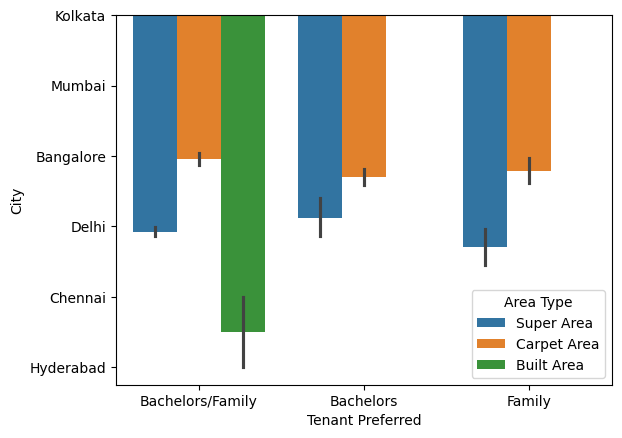

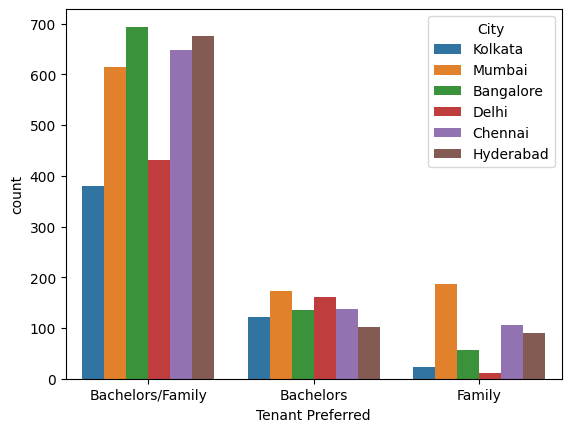

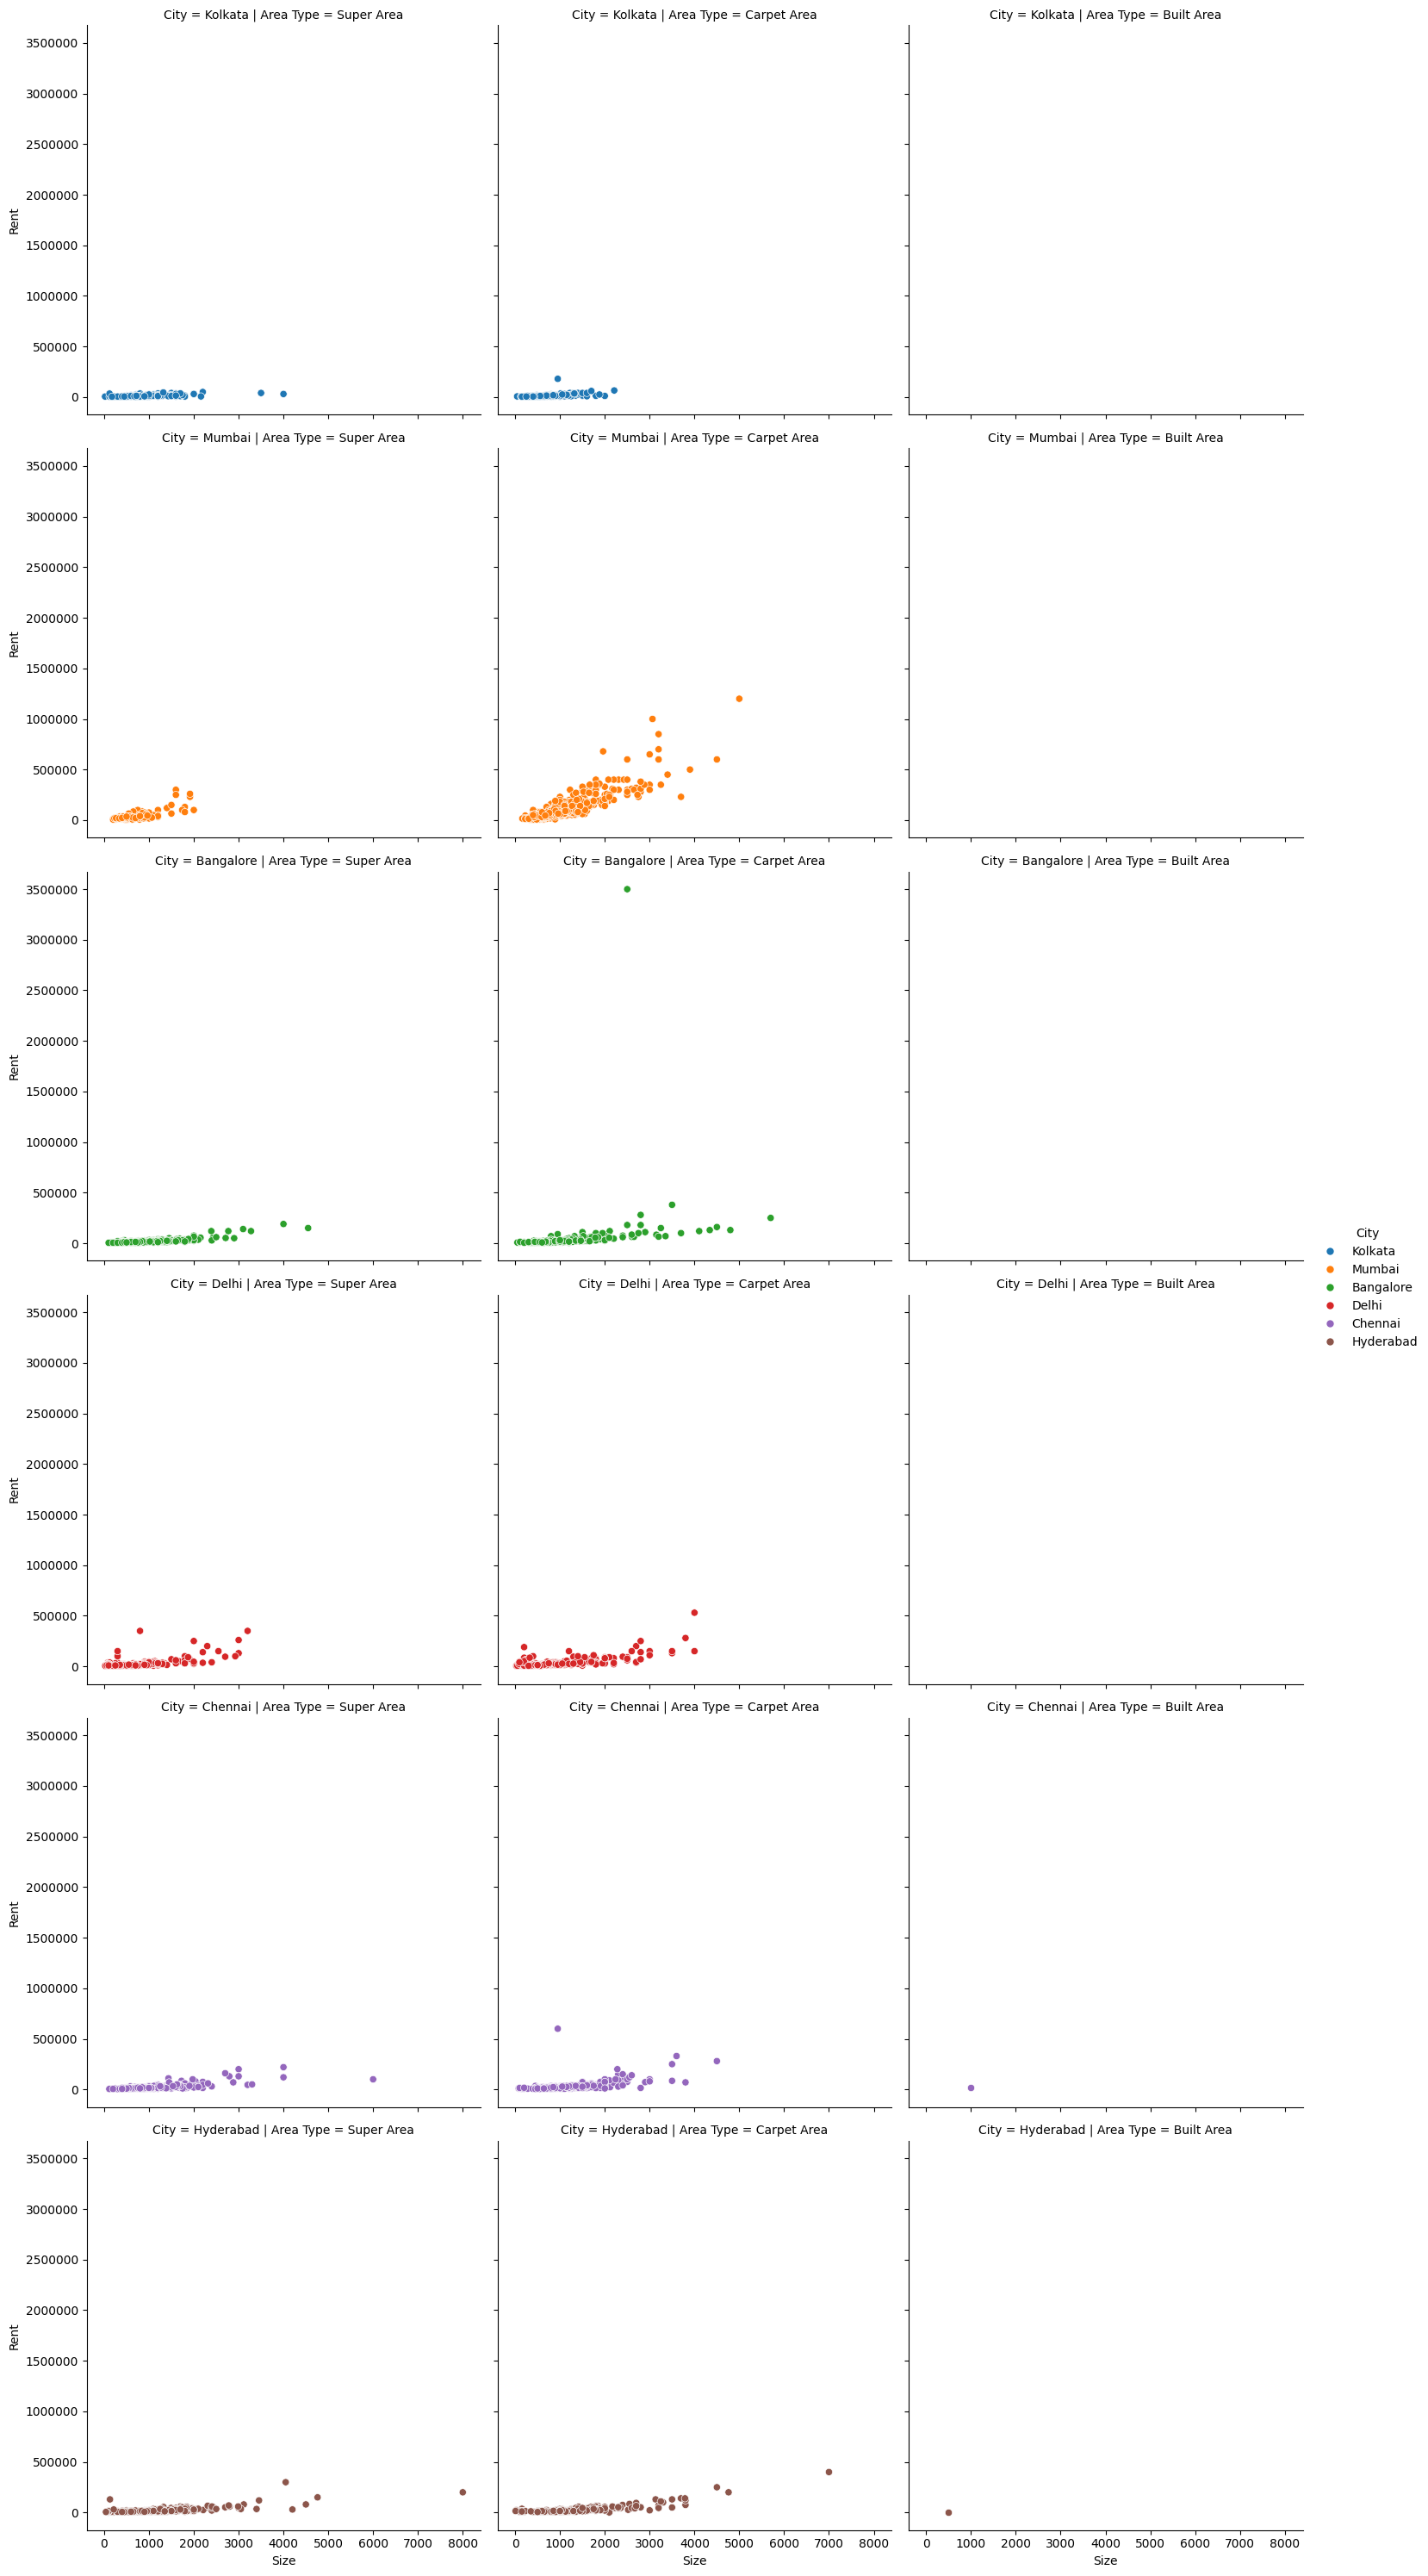

In [59]:
sns.barplot(x='Tenant Preferred', y='City', data=df, hue='Area Type')
plt.show()
sns.countplot(x='Tenant Preferred', data=df, hue='City')
plt.show()
sns.relplot(x='Size', y='Rent', kind='scatter', data=df, hue='City', row='City', col='Area Type')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [60]:
rent_greater = df.loc[df['Rent'] > 500000, :]
print(df['Rent'].max())
print(rent_greater.head())

3500000
       Posted On  BHK     Rent  Size         Floor    Area Type  \
726   2022-06-20    4   600000  2500  12 out of 13  Carpet Area   
792   2022-06-13    5   600000  3200  10 out of 16  Carpet Area   
827   2022-05-18    4  1000000  3064  18 out of 45  Carpet Area   
1001  2022-06-01    4  1200000  5000   4 out of 15  Carpet Area   
1319  2022-05-31    5   650000  3000   8 out of 10  Carpet Area   

                 Area Locality    City Furnishing Status  Tenant Preferred  \
726   Mount Marry, Bandra West  Mumbai    Semi-Furnished  Bachelors/Family   
792                Bandra East  Mumbai    Semi-Furnished  Bachelors/Family   
827      Raheja Artesia, Worli  Mumbai    Semi-Furnished            Family   
1001                      Juhu  Mumbai    Semi-Furnished  Bachelors/Family   
1319                 Khar West  Mumbai    Semi-Furnished  Bachelors/Family   

      Bathroom Point of Contact  
726          4    Contact Agent  
792          5    Contact Agent  
827          4    

In [ ]:
"""
IMPORTANT FEATURES
-Size
-BHK
-Bathroom
-City (dum)
-Area Type (dum)
-Furnishing Status (dum)
-Tenant Preferred (dum)

TRASH FEATURES
-Posted On
-Floor
-Area Locality
-Point of Contact

TARGET VARIABLE
-Rent
"""

'\nIMPORTANT FEATURES\n-Size\n-BHK\n-Bathroom\n-City (dum)\n-Area Type (dum)\n-Furnishing Status (dum)\n-Tenant Preferred (dum)\n\nTARGET VARIABLE\n-Rent\n'

In [72]:
converted_features = pd.get_dummies(columns=['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred'], data=df)
features = converted_features.drop(columns=['Posted On','Floor','Area Locality','Point of Contact']).astype(int)
print(features.head())

   BHK   Rent  Size  Bathroom  City_Bangalore  City_Chennai  City_Delhi  \
0    2  10000  1100         2               0             0           0   
1    2  20000   800         1               0             0           0   
2    2  17000  1000         1               0             0           0   
3    2  10000   800         1               0             0           0   
4    2   7500   850         1               0             0           0   

   City_Hyderabad  City_Kolkata  City_Mumbai  Area Type_Built Area  \
0               0             1            0                     0   
1               0             1            0                     0   
2               0             1            0                     0   
3               0             1            0                     0   
4               0             1            0                     0   

   Area Type_Carpet Area  Area Type_Super Area  Furnishing Status_Furnished  \
0                      0                     1   

In [ ]:
scaler = StandardScaler()